# 线性回归 调用API 选取部分特征

## 导入包

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.feature_selection import VarianceThreshold

## 数据集分割
X是前13列特征，y是房价

In [91]:
Boston = load_boston()
X = Boston.data  
y = Boston.target

### 表示舍弃所有方差小于1的特征

In [92]:
selector = VarianceThreshold(1)
X_var0 = selector.fit_transform(X)
X_var0.shape

(506, 10)

分割测试集，训练集，比例为1：4

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_var0,y,test_size=0.2,random_state=888)

In [94]:
X_train.shape

(404, 10)

In [95]:
y_train.shape

(404,)

## 回归预测

In [96]:
lin_reg = LinearRegression()

在训练集拟合

In [97]:
lin_reg.fit(X_train,y_train)

LinearRegression()

对测试集评估
### 结果0.6703055202990076小于0.755893222063329（全部特征预测）

In [98]:
lin_reg.score(X_test,y_test)

0.6703055202990076

对测试集的特征预测得到的房价

In [99]:
test_pred = lin_reg.predict(X_test)
test_pred

array([19.74917836, 33.62289917, 21.47085144, 21.16854662, 21.15438659,
       24.1055678 , 31.85988585, 28.39665121, 22.12418764, 13.2753632 ,
       21.44961075, 26.72640443, 21.15298114, 24.49689913, 19.20866197,
       11.10897137, 16.49685421, 24.90545364, 28.20724796, 28.66021463,
       24.5140849 , 32.0680795 , 24.35164249, 26.27940752, 29.56918298,
       13.16793485, 23.71173681, 17.50317326, 26.1787277 , 27.54628687,
       26.36433963, 26.67358347, 17.62545164, 14.30230693, 22.94235554,
       32.40809095, 19.57758319, 19.09584697, 22.37117945, 18.5266018 ,
       31.66097631, 27.51909595, 28.93740589, 24.8338167 , 21.98118376,
       10.90025436, 34.68509704, 17.47339194, -4.02150942, 28.79666777,
       23.63429533, 16.03684064, 15.18412063, 24.99026848, 11.92159478,
       26.63710907, 17.92324348, 17.41920805, 34.33998761, 27.85063967,
       31.38654269, 24.85259985, 31.59429004, 28.02695913, 30.01916596,
       25.91189311, 22.29062086, 29.26823185, 30.07033607, 23.52

真实的房价

In [100]:
y_test

array([22.4, 32.4, 21.7, 24.5, 16.8, 21.1, 29.4, 28.7, 21.5, 13.6, 21.4,
       24.8, 16.8, 19.4, 21.7, 17.2, 17.1, 18.7, 22.3, 25. , 24.4, 34.6,
       20.1, 22.3, 26.7, 15.6, 19.5, 14.3, 22.7, 21.6, 25. , 24.7, 17.8,
       12.7, 22.7, 46.7, 20.2, 27.1, 25. , 19.9, 32. , 23.2, 32.2, 19.2,
       21. , 13.4, 31.6, 16.7,  7. , 24.5, 24.2, 11.5, 10.9, 22. , 15.7,
       25.3, 14.9, 15. , 33.4, 28.7, 50. , 25. , 29.9, 26.6, 28.7, 20.5,
       23. , 37. , 30.3, 16.2, 22.2, 19.9, 36. , 48.5, 26.4, 19.8, 17.8,
       38.7, 11.7, 13.8, 15.2, 30.1,  8.1, 30.1, 24. , 17.8, 13.8,  7.5,
       41.3, 20.1, 13.9, 50. , 20.3, 22.6, 25. , 20.5, 12.8, 19.5, 22. ,
       19.1, 24.6, 50. ])

## 模型评估
计算MSE
### 结果3.711054178016011大于3.143244028934462（全部特征评估）

In [101]:
# 残差
deviation = lin_reg.predict(X_test) - y_test

In [102]:
MSE = np.sum(np.sqrt(deviation * deviation))/102
MSE

3.711054178016011

## 数据可视化

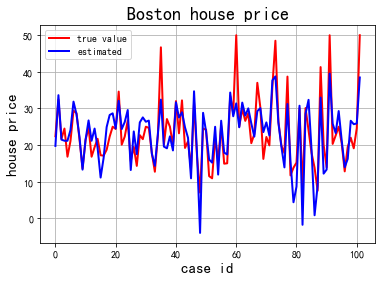

In [103]:
import matplotlib as mpl
#对测试集上的标注值与预测值进行可视化呈现   
t = np.arange(len(y_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', lw=2, label=u'true value')
plt.plot(t, test_pred, 'b-', lw=2, label=u'estimated')
plt.legend(loc = 'best')
plt.title(u'Boston house price', fontsize=18)
plt.xlabel(u'case id', fontsize=15)
plt.ylabel(u'house price', fontsize=15)
plt.grid()
plt.show()

### 总体预测结果比选取全部特征差